In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim
from sklearn.preprocessing import StandardScaler



In [119]:
data_dir = "/content/Healthcare-Diabetes.csv"

In [120]:
df = pd.read_csv(data_dir)
df


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


In [121]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [123]:
df.isnull().sum()

,0
Id,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


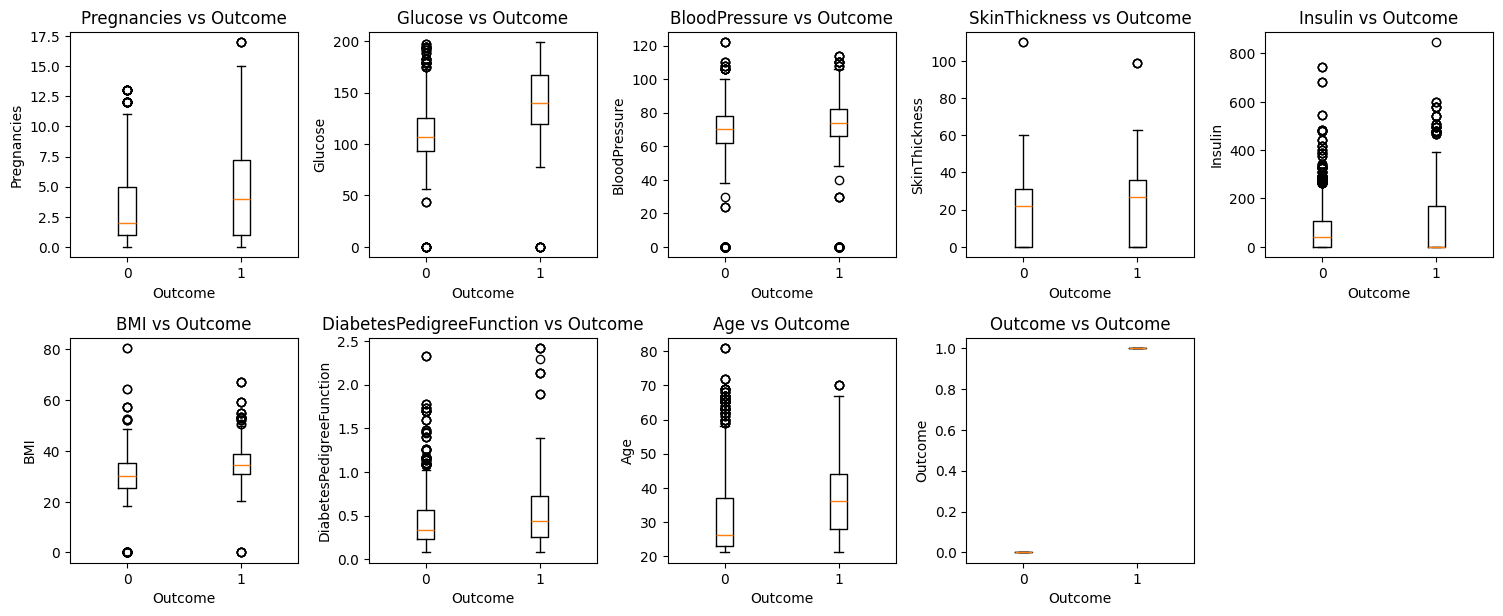

In [124]:
features = df.columns.drop("Id", "Outcome")
plt.figure( figsize=(15,15))
for i, col in enumerate(features, 1):
  plt.subplot(5,5,i)
  plt.boxplot([df[df["Outcome"]==0][col],df[df["Outcome"]==1][col]], tick_labels=["0","1"])
  plt.title(f"{col} vs Outcome" )
  plt.xlabel("Outcome")
  plt.ylabel(col)

plt.tight_layout()
plt.show()

In [125]:
mean = df.mean(numeric_only=True)

In [126]:
median = df.median(numeric_only=True)


In [127]:
summary = pd.DataFrame({"Mean": mean,
                        "Median": median})

summary

,Mean,Median
Id,1384.500000,1384.500
Pregnancies,3.742775,3.000
Glucose,121.102601,117.000
BloodPressure,69.134393,72.000
SkinThickness,20.824422,23.000
Insulin,80.127890,37.000
BMI,32.137392,32.200
DiabetesPedigreeFunction,0.471193,0.375
Age,33.132225,29.000
Outcome,0.343931,0.000


In [128]:
group_summary = df.groupby("Outcome").agg(["mean", "median"])
group_summary

Id         Pregnancies            Glucose         \
                mean  median        mean median        mean median   
Outcome                                                              
0        1388.143722  1377.5    3.204295    2.0  110.419604  107.0   
1        1377.549370  1405.5    4.769958    4.0  141.481092  140.0   

        BloodPressure        SkinThickness           Insulin         \
                 mean median          mean median       mean median   
Outcome                                                               
0           68.119493   70.0     19.945485   22.0  70.075991   42.5   
1           71.070378   74.0     22.501050   27.0  99.302521    0.0   

               BMI        DiabetesPedigreeFunction               Age         
              mean median                     mean median       mean median  
Outcome                                                                      
0        30.494989   30.1                 0.433316  0.340  31.111233   26.0  
1        35.270378   34.3                 0.543445  0.439  36.987395   36.0

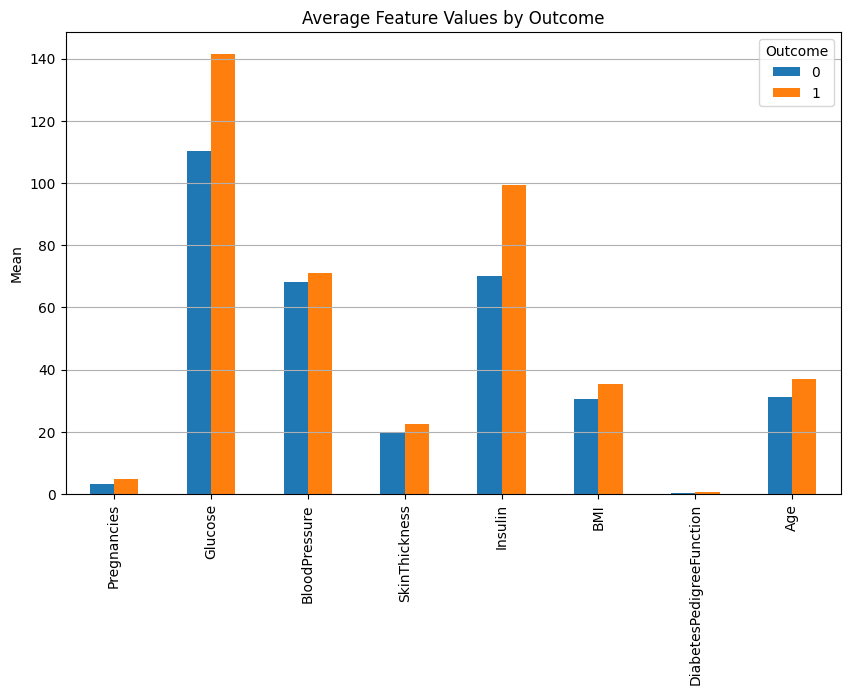

In [129]:
df.drop("Id", axis=1).groupby('Outcome').mean(numeric_only=True).T.plot(kind='bar', figsize=(10,6))
plt.title('Average Feature Values by Outcome')
plt.ylabel('Mean')
plt.grid(axis='y')
plt.show()


In [130]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [131]:
x = df.iloc[:,1:9]
y = df["Outcome"]
print(x)
print(y)


      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               6      148             72             35        0  33.6   
1               1       85             66             29        0  26.6   
2               8      183             64              0        0  23.3   
3               1       89             66             23       94  28.1   
4               0      137             40             35      168  43.1   
...           ...      ...            ...            ...      ...   ...   
2763            2       75             64             24       55  29.7   
2764            8      179             72             42      130  32.7   
2765            6       85             78              0        0  31.2   
2766            0      129            110             46      130  67.1   
2767            2       81             72             15       76  30.1   

      DiabetesPedigreeFunction  Age  
0                        0.627   50  
1                      

In [132]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [133]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [134]:
y = np.array(y, dtype="float32")



In [135]:
sc = StandardScaler()
x = sc.fit_transform(x)
x


array([[ 0.67923239,  0.83973755,  0.1490333 , ...,  0.18113541,
         0.47850939,  1.43249494],
       [-0.82534128, -1.12712422, -0.16301222, ..., -0.68577327,
        -0.36913043, -0.18107914],
       [ 1.28106186,  1.93243853, -0.26702739, ..., -1.09445879,
         0.61671153, -0.09615419],
       ...,
       [ 0.67923239, -1.12712422,  0.46107882, ..., -0.11609042,
        -0.2739245 ,  0.75309532],
       [-1.12625601,  0.24655701,  2.12532159, ...,  4.32991267,
        -0.4674075 , -0.6057039 ],
       [-0.52442655, -1.25200433,  0.1490333 , ..., -0.25231893,
         0.23281669, -0.69062885]])

# Completed with Data Import



In [136]:
x = torch.tensor(x)

In [137]:
y = torch.tensor(y)
y = y.unsqueeze(1)

In [138]:
print(x.shape)
print(y.shape)

torch.Size([2768, 8])
torch.Size([2768, 1])


# Creating Custom Dataset


In [139]:
class Dataset(Dataset):
  def __init__(self, x, y):
    self.x = x
    self.y = y

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return len(self.x)


In [140]:
dataset = Dataset(x,y)

len(dataset)

2768

In [141]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=True)

In [142]:
for x,y in train_loader:
  print(x.shape)
  print(y.shape)

torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])
torch.Size([32, 8])
torch.Size([32, 1])


#Creating the Model

In [146]:
class model(nn.Module):
  def __init__(self, input_features, output_features):
    super(model, self).__init__()
    self.fc1 = nn.Linear(input_features, 32)
    self.fc2 = nn.Linear(32, 64)
    self.fc3 = nn.Linear(64, 56)
    self.fc4 = nn.Linear(56, 32)
    self.fc5 = nn.Linear(32, output_features)

    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.fc1(x)
    x = self.relu(x)
    x = self.fc2(x)
    x = self.relu(x)
    x = self.fc3(x)
    x = self.relu(x)
    x = self.fc4(x)
    x = self.relu(x)
    x = self.fc5(x)
    x = self.sigmoid(x)
    return x



In [147]:
network = model(8,1)
loss_fn = torch.nn.BCELoss()
optimizer = torch.optim.Adam(network.parameters(), lr=0.001)

# Training the model


In [162]:
train_losses = []
train_accuracies = []

epochs = 50
for epoch in range(epochs):

  train_loss = 0.0
  correct = 0
  total = 0

  for inputs, labels in train_loader:
    inputs = inputs.float()
    labels = labels.float()

    outputs =  network(inputs)
    loss = loss_fn(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_loss += loss.item()
    predicted = (outputs > 0.5).float()
    correct += (predicted == labels).sum().item()
    total += labels.numel()

  train_accuracy = correct/total
  train_loss = train_loss/len(train_loader)
  train_losses.append(train_loss)
  train_accuracies.append(train_accuracy)

  print(f"Epoch: {epoch} and Accuracy: {train_accuracy:.6f}, Training Loss: {train_loss:.6f}")


Epoch: 0 and Accuracy: 0.993225, Training Loss: 0.027740
Epoch: 1 and Accuracy: 0.996838, Training Loss: 0.016771
Epoch: 2 and Accuracy: 0.993225, Training Loss: 0.022731
Epoch: 3 and Accuracy: 0.987353, Training Loss: 0.036311
Epoch: 4 and Accuracy: 0.981933, Training Loss: 0.072806
Epoch: 5 and Accuracy: 0.965673, Training Loss: 0.084041
Epoch: 6 and Accuracy: 0.990063, Training Loss: 0.037586
Epoch: 7 and Accuracy: 0.994580, Training Loss: 0.021735
Epoch: 8 and Accuracy: 0.988257, Training Loss: 0.037113
Epoch: 9 and Accuracy: 0.995935, Training Loss: 0.015481
Epoch: 10 and Accuracy: 0.999097, Training Loss: 0.011178
Epoch: 11 and Accuracy: 0.998645, Training Loss: 0.008800
Epoch: 12 and Accuracy: 0.997742, Training Loss: 0.009010
Epoch: 13 and Accuracy: 0.999097, Training Loss: 0.007143
Epoch: 14 and Accuracy: 0.995935, Training Loss: 0.021262
Epoch: 15 and Accuracy: 0.968835, Training Loss: 0.143234
Epoch: 16 and Accuracy: 0.987805, Training Loss: 0.042562
Epoch: 17 and Accuracy: 

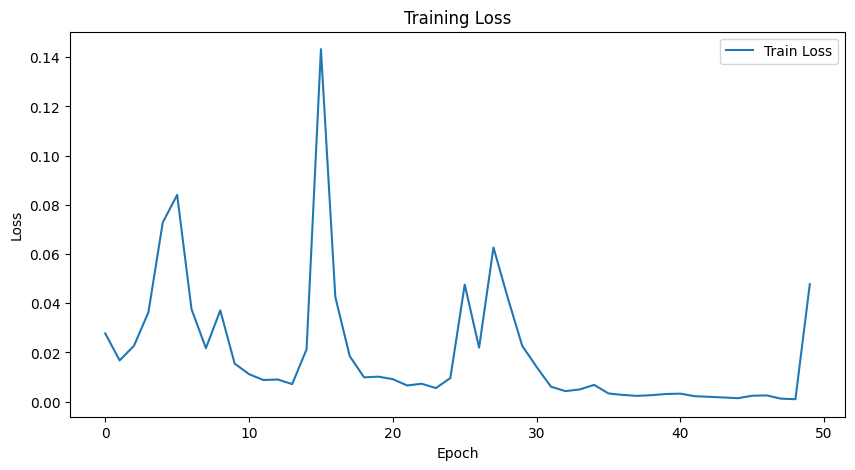

In [165]:
plt.figure(figsize=(10,5))
plt.plot(range(epochs), train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

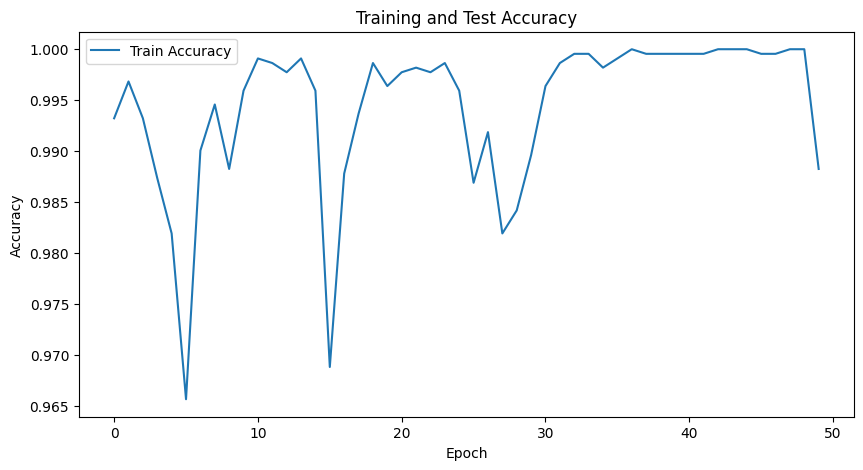

In [164]:
plt.figure(figsize=(10,5))
plt.plot(range(epochs), train_accuracies, label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()

In [157]:
test_losses = []
test_accuracies = []

network.eval()  # set model to evaluation mode
correct = 0
total = 0
test_loss = 0.0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.float()

        outputs = network(inputs)
        loss = loss_fn(outputs, labels)
        test_loss += loss.item()

        predicted = (outputs > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.numel()

test_accuracy = correct / total
test_loss = test_loss / len(test_loader)

test_losses.append(test_loss)
test_accuracies.append(test_accuracy)

print(f"Test Accuracy: {test_accuracy:.6f}, Test Loss: {test_loss:.6f}")


Test Accuracy: 0.989170, Test Loss: 0.060064
